# JSON 가져오기 

In [2]:
# 필요한 모듈 

import requests 
import json

## 온라인 상의 url

url = "https://data.hossam.kr/sample.json"

## 접속객체 생성

session = requests.Session()
# 접속 정보(headers) 설정
userAgent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"

session.headers.update({
    "Referer" : "", ## 전에 머물렀던 페이지 url
    "User-Agent" : userAgent ## 브라우저 및 os버전정보
})


In [2]:
# 특정 웹페이지 접속
r = session.get(url)

# 접속에 실패한 경우
if r.status_code != 200:
    msg = "[%d Error] %s 에러가 발생함" % (r.status_code,r.reason)
    raise Exception(msg)

## 인코딩 방식 
r.encoding = 'utf-8'
## 텍스트 출력 
print(r.text)
## 가져온 문자열을 딕셔너리로 변환
data=json.loads(r.text)


InvalidURL: Invalid URL 'https:data.hossam.kr/sample.json': No host supplied

# 파일 다운로드 받기

In [3]:
# 필요한 모듈 

import requests 
from IPython.display import Image


## 온라인 상의 url
## 샘플 이미지 파일
url = "https://data.hossam.kr/sample.png"

## 접속객체 생성

session = requests.Session()
# 접속 정보(headers) 설정
userAgent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"

session.headers.update({
    "Referer" : "", ## 전에 머물렀던 페이지 url
    "User-Agent" : userAgent ## 브라우저 및 os버전정보
})


저장 완료


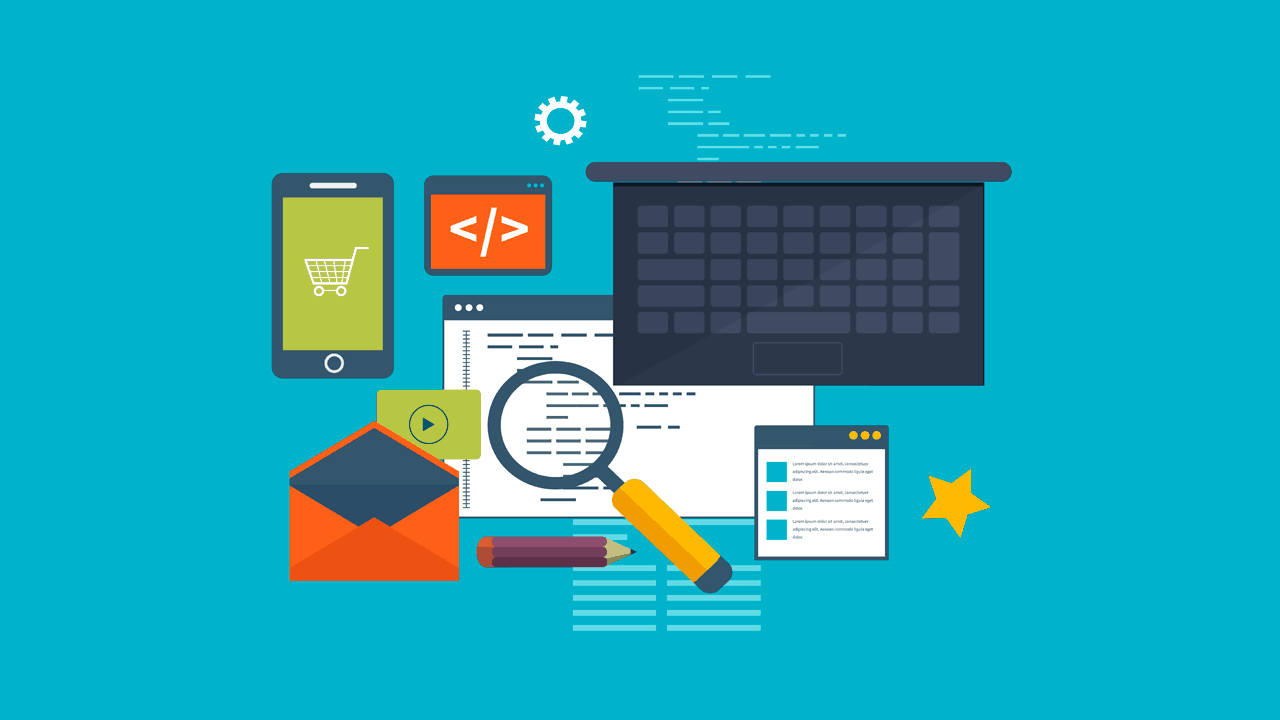

In [4]:
## 특정 웹페이지 접속
## 가져오고자 하는 컨텐츠가 텍스트 형식이 아니면 stream = True

r = session.get(url,stream=True)

# 접속에 실패한 경우
if r.status_code != 200:
    msg = "[%d Error] %s 에러가 발생함" % (r.status_code,r.reason)
    raise Exception(msg)

## 인코딩 방식 
r.encoding = 'utf-8'

## 이미지 파일 저장 

with open('sample2.png','wb') as f :
    # 통신으로 가져온 내용의 바이너리를 직접 추출 : 이미지 파일
    f.write(r.raw.read())
    print("저장 완료")

Image("sample.png")



# 영화진흥위원회 Open Api 연동

In [ ]:
# 모듈 import 
import requests
import json
import datetime as dt
from pandas import DataFrame

# 온라인 상의 url 받아오기
## 영화 박스오피스 순위 데이터 
urlFmt = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key={key}&targetDt={targetDt}"

# 발급받은 API 연동키
API_KEY = "6d2cf4aa96725383235c717f2e569f1e"

# 하루 전 날짜 얻기
date = dt.datetime.now - dt.timedelta(days=1)
yesterday = data.datetime("%Y%m%d")

# 최종 url
url = urlFmt.format(key=API_KEY,targetDt=yesterday)

## 접속객체 생성

session = requests.Session()
# 접속 정보(headers) 설정
userAgent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"

session.headers.update({
    "Referer" : "", ## 전에 머물렀던 페이지 url
    "User-Agent" : userAgent ## 브라우저 및 os버전정보
})

## 특정 웹페이지 접속


r = session.get(url)

# 접속에 실패한 경우
if r.status_code != 200:
    msg = "[%d Error] %s 에러가 발생함" % (r.status_code,r.reason)
    raise Exception(msg)

## 인코딩 방식 
r.encoding = 'utf-8'

# 가져온 문자열을 딕셔너리로 전환
## json파일이라서 ㅇㅇ 
data = json.loads(r.text)
dailyBoxOfficeList = data['boxOfficeResult']['dailyBoxOfficeList']

## 결과 표 생성
df = DataFrame(dailyBoxOfficeList)


# 05 카카오 책검색


In [6]:
# 모듈 import 
import requests
import json
from pandas import DataFrame


## REST API 키값 	1dac6609b89162d4b62fa47385304f6b
## URL 값 https://dapi.kakao.com/v3/search/book
## 쿼리파라미터
## https://dapi.kakao.com/v3/search/book?query=검색어 query라는 파리미터 쓴 예

# 접속할 url
urlFmt="https://dapi.kakao.com/v3/search/book?query={query}&page={page}&size={size}"

# 요청변수 
query = "파이썬"
page = 1
size = 50
key = "1dac6609b89162d4b62fa47385304f6b"

# 접속객체 생성
session = requests.Session()
# 접속객체에 header정보 입력

session.headers.update({
    "Authorization": "KakaoAK %s" % key
})

## 접속 url

url = urlFmt.format(query=query,page=page,size=size)

## 생성한 접속객체를 통해 접속

r = session.get(url)

## 접속에 실패한 경우
if r.status_code!=200:
    # 에러코드와 에러 메세지 출력
    msg="{%d Error} %s 에러가 발생함" % (r.status_code,r.reason)
    # 에러를 강제로 생성시킴
    raise Exception(msg)
## 인코딩 형식 지정

encoding='utf-8'
# 가져온 문자열을 딕셔너리로 반환

data= json.loads(r.text)

df=DataFrame(data['documents'])
df

,authors,contents,datetime,isbn,price,publisher,sale_price,status,thumbnail,title,translators,url
0,[윤인성],『혼자 공부하는 파이썬』이 더욱 흥미있고 알찬 내용으로 개정되었습니다. 프로그래밍이...,2022-06-01T00:00:00.000+09:00,1162245654 9791162245651,22000,한빛미디어,19800,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,혼자 공부하는 파이썬,[],https://search.daum.net/search?w=bookpage&book...
1,[박응용],문과생도 중고등학생도 직장인도 프로그래밍에 눈뜨게 만든 바로 그 책이 전면 개정판으...,2019-06-20T00:00:00.000+09:00,1163030910 9791163030911,18800,이지스퍼블리싱,16920,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Do it! 점프 투 파이썬,[],https://search.daum.net/search?w=bookpage&book...
2,[윤인성],"이 책은 독학으로 프로그래밍 언어를 처음 배우려는 입문자가, 혹은 파이썬을 배우려는...",2019-06-10T00:00:00.000+09:00,1162241888 9791162241882,18000,한빛미디어,16200,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,혼자 공부하는 파이썬,[],https://search.daum.net/search?w=bookpage&book...
3,[박응용],개정 2판으로 새롭게 태어났다! 챗GPT를 시작으로 펼쳐진 생성 AI 시대에 맞춰 ...,2023-06-15T00:00:00.000+09:00,1163034738 9791163034735,22000,이지스퍼블리싱,19800,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Do it! 점프 투 파이썬,[],https://search.daum.net/search?w=bookpage&book...
4,[Y. Daniel Liang],이 책은 누구나 쉽게 따라할 수 있는 파이썬 프로그래밍 언어에 기반하고 있기 때문에...,2018-03-02T00:00:00.000+09:00,8920028893 9788920028892,35000,에피스테메,31500,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,파이썬,[길준민],https://search.daum.net/search?w=bookpage&book...
5,[웨스 맥키니],"『파이썬 라이브러리를 활용한 데이터 분석』은 NumPy, pandas, matplo...",2013-10-01T00:00:00.000+09:00,8968480478 9788968480478,33000,한빛미디어,29700,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,파이썬 라이브러리를 활용한 데이터 분석(수정개정판),[김영근],https://search.daum.net/search?w=bookpage&book...
6,"[염기원, 오지영]","비전공자의 데이터 분석을 위한 『파이썬』은 〈파이썬 기초〉, 〈파이썬을 이용한 데이...",2020-08-20T00:00:00.000+09:00,1159069042 9791159069048,15000,복두출판사,13500,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,파이썬(비전공자의 데이터 분석을 위한),[],https://search.daum.net/search?w=bookpage&book...
7,"[한선관, 김태령]",이 책은 지금까지 경험하지 못한 코딩 교육의 진수를 보여준다. “코딩 교육이 가야 ...,2019-02-28T00:00:00.000+09:00,8970509720 9788970509723,29000,생능출판,26100,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,파이썬(컴퓨팅 사고를 위한),[],https://search.daum.net/search?w=bookpage&book...
8,[이강성],,2005-08-29T00:00:00.000+09:00,8989345774 9788989345770,35000,프리렉,-1,,https://search1.kakaocdn.net/thumb/R120x174.q8...,파이썬(열혈강의)(개정판 VER.2),[],https://search.daum.net/search?w=bookpage&book...
9,[박응용],《Do it! 점프 투 파이썬》은 지난 10년간 온라인 독자들의 질문 댓글에 답변하...,2016-03-03T00:00:00.000+09:00,8997390910 9788997390915,18800,이지스퍼블리싱,16920,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Do it! 점프 투 파이썬,[],https://search.daum.net/search?w=bookpage&book...


# 06 카카오 책검색 반복처리 


In [ ]:
# 모듈 import 
import requests
import json
from pandas import DataFrame


## REST API 키값 	1dac6609b89162d4b62fa47385304f6b
## URL 값 https://dapi.kakao.com/v3/search/book
## 쿼리파라미터
## https://dapi.kakao.com/v3/search/book?query=검색어 query라는 파리미터 쓴 예

## 접속할 url

urlFmt="https://dapi.kakao.com/v3/search/book?query={query}&page={page}&size={size}"

## 요청변수

query="파이썬"
page=1
size=50
key="1dac6609b89162d4b62fa47385304f6b"

## 접속객체 새성

session = requests.Session()
## 접속객체에 header 정보 삽입

session.header.update({
    "Authorization": "KakaoAK %s" % key
})

## 다음페이지 존재하는지 판단하기 위해 
isEnd = False 

## 반복수행 도중 추출되는 검색결과 리스트를 결합한 리스트 
result= [] 

while not isEnd :
    url = urlFmt.format(query = query, page = page, size = size)
    # 접속 
    r=session.get(url)
    # 접속에 실패한 경우
    if r.status_code != 200 :
        msg = "[ %d Error ] %s 에러가 발생함. " % (r.status_code,r.reason)
        raise Exception(msg)
    r.encoding = 'utf-8'

    # 가져온 문자열을 딕셔너리로 바환

    data = json.loads(r.text)

    ## 검색결과를 갖고 있는 딕셔너리를 포함하는 리스트 
    searchList = data['documents']
    result.extend(searchList)
    isEnd = bool(data['meta']['is_end'])
    page + =1
print('최종 검색 건수 : %d '% len(result))

# 데이터프레임으로 ㄱㄱ 
df = DataFrame(result)


# 07 카카오 이미지 검색

In [7]:
import requests
import json
from pandas import DataFrame
import os

## 접속 url 포맷
urlFmt="https://dapi.kakao.com/v2/search/image?query={query}&page={page}&size={size}"

## 요청변수
query = "봄 패션"
page = 1
size = 80
key="1dac6609b89162d4b62fa47385304f6b"

## 접속객체 생성
session=requests.Session()

## 브라우저 버전정보
userAgent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"

## 접속객체에 header정보 삽입

session.headers.update({
    "Authorization": "KakaoAK %s" % key
})

# 1페이지 부터 시갖 & 카운팅
page=1
count=0

# 다음페이지가 존재하는지 확인하기 위해 meta 안에 있는 isEnd값 설정
isEnd=False 

## 카카오 url 접속
while not isEnd :
    url = urlFmt.format(query=query, page=page, size=size)
    ## url 접속
    r= session.get(url)
    if r.status_code != 200 :
        msg = "[%d Error] %s 에러가 발생함" % (r.status_code,r.reason)
        raise Exception
    r.encoding='utf-8'
    data = json.loads(r.text)
    searchList = data['documents']
    isEnd = bool(data['meta']['is_end'])
    ## 이미지 저장할 폴더 만들기 
    if os.path.exists(query) == False:
        os.mkdir(query)
    ##이미지 저장 
    ## 이미지 저장 위해서 이전페이지 & 이미지 페이지로 접속해야됌 
    for i,v in enumerate(searchList) :
        count += 1
        docUrl = v['doc_url']
        imageUrl = v['image_url']
        ## 접속하기 위해 다시 header정보 update
        session.headers.update({
            "Authorization": "KakaoAK %s" % key,
            "Referer": docUrl,
            "User-Agent" : userAgent
        })

        try :
            r = session.get(imageUrl,stram=True)
        except :
            continue
        if r.status_code !=200 :
            continue
        fileName = "%s/%05d.png" % (query,count)
        with open(fileName,'wb') as f :
            f.wirte(r.raw.read())
            print(fileName,"저장완료")


KeyboardInterrupt: 

# 08 간단한 크롤링


In [12]:
# 필요한 모듈 설치
import requests

from bs4 import BeautifulSoup


## 수집대상 url
# https://data.hossam.kr/sample.html

userAgent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"

## 접속객체 생성 
session = requests.Session()

## 접속객체에 header 정보 삽입 
session.headers.update({
    "Referer" : "",
    "User-Agent"  :userAgent
})

## 수집할 컨텐츠가 있는 주소 

url="https://data.hossam.kr/sample.html"

## 접속객체를 통해 url 접속
r = session.get(url)

## 접속에 실패했을 때
if r.status_code!=200 :
    # 200이 아니면 에러코드와 에러메세지 출력
    msg = "[%d Error] %s 에러가 발생함" % {r.status_code,r.reason}
    # 에러를 강제로 생성시킨다.
    raise Exception(msg)

# 인코딩 형식 지정
r.encoding = 'utf-8'

## html 파일 열기 
soup = BeautifulSoup(r.text)

## soup객체로 부터 원하는 부분 추출하기 

## html태그에 의한 추출

test1 =soup.select("h1")
print(test1)
## -> 리스트 유형이므로 인덱스를 통한 접근간으
print(test1[0])
## -> 텍스트만 추출 + 공백제거 꼭해야함
print(test1[0].text.strip())

## class에 의한 추출

test2 = soup.select(".myclass")
print(test2)

## enumerate함수는 인덱스랑 값으로 이루어진 튜플로 만들어준다 

for i,v in enumerate(test2):
    print(f'{i}번째 요소  : {v.text.strip()}')

## 하위요소 추출하기 
li = test2[2].select('li')
print(li)
for i in li :
    print(i.text.strip())


## id에 의한 추출 
## id 값은 해당 웹페이지 내에서 단 하나만 존재하기 떄문에 반복문 필요 없음

test3 = soup.select("#myid")
print(test3)
print(test3[0].text.strip())

[<h1>Hello World</h1>]
<h1>Hello World</h1>
Hello World
[<li class="myclass">연산자</li>, <li class="myclass">데이터 전처리</li>, <ol class="myclass">
<li>기초통계</li>
<li>데이터 시각화</li>
</ol>]
0번째 요소  : 연산자
1번째 요소  : 데이터 전처리
2번째 요소  : 기초통계
데이터 시각화
[<li>기초통계</li>, <li>데이터 시각화</li>]
기초통계
데이터 시각화
[<h2 id="myid">Python</h2>]
Python


# 09 블로그 게시글 수집



In [13]:
# 필요한 모듈 참조
import requests
from bs4 import BeautifulSoup
from pandas import DataFrame



In [25]:

## 수집할 컨텐츠가 있는 웹페이지 주소
url = "https://blog.hossam.kr/"

#브라우저 버전정보
userAgent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"

## 접속객체 생성
session=requests.Session()

# 접속객체에 header정보 삽입
session.headers.update({
    "Referer": "",
    "User-Agent": userAgent    
})

## 접속객체를 통해 api접속
r= session.get(url)

# 접속에 실패했을 때 

if r.status_code!=200 :
    # 200이 아니면 에러코드와 에러메세지 출력
    msg = "[%d Error] %s 에러가 발생함" % {r.status_code,r.reason}
    # 에러를 강제로 생성시킨다.
    raise Exception(msg)
    
# 인코딩 형식 지정
r.encoding = 'utf-8'
## 전체 html파일
soup = BeautifulSoup(r.text)

## 필요한 내용 추출하기 

articleList = soup.select(".post")
articleList

## 수집한 결과가 저장될 빈 리스트

result = []
## 제목
## 작성일
## 요약

for article in articleList :
    ## 제목 
    titleEl = article.select(".entry-title > a")
    # print(titleEl)
    title = titleEl[0].text.strip()
    # print(title)
    ## 작성일 
    publishedEl = article.select(".published")
    # print(publishedEl)
    published = publishedEl[0].attrs['datetime']
    # print(published)
    ## 요약글
    contentEl = article.select(".entry-content > p")
    # print(contentEl)
    content = contentEl[0].text.strip()
    # print(content)

    ## 추출한 내용을 딕셔너리로 
    item = {"제목" : title ,"작성일" : published ,"요약글" : content}

    result.append(item)

print(result)


## 데이터 프레임으로 
df = DataFrame(result)
print(df)

[{'제목': '[R] 패키지의 이해', '작성일': '2022-12-14', '요약글': '패키지란 R이 제공하지 않는 기능을 구현해 놓은 일종의 확장팩을 말합니다. 온라인에 등록되어 있는 패키지를 다운로드 받아 설치하고 그 패키지에 포함된 기능들을 로드해서 사용할 수 있으며 대부분의 데이터 분석, 시각화 관련 기능은 패키지를 통해 제공됩니다.'}, {'제목': '[R] 내장함수', '작성일': '2022-12-13', '요약글': '내장함수는 데이터 분석가에게 제공되어질 목적으로 R 안에 사전에 정의되어 내장되어 있는 기능으로 대부분 기본 데이터(스칼라값)를 가공하는 기능입니다. R에 내장되어 있는 기능이므로 내부 코드를 볼 수는 없기 때문에 어떤 종류가 있는지, 어떤 파라미터를 전달하는지, 어떤 결과값을 반환하는지만 파악해서 활용하는 것에 중점을 두고 파악하는 것이 중요합니다.'}, {'제목': '[R] 함수의 이해', '작성일': '2022-12-12', '요약글': '함수란 자주 사용되는 명령어들을 그룹화해서 생성한 재사용 가능 단위를 의미합니다. 어릴적 공부한 수학의 함수도 같은 의미로 이해할 수 있습니다.'}, {'제목': '[R] 프로그램 흐름제어 (3) - 기본 문법 활용하기', '작성일': '2022-12-11', '요약글': 'if, while, for 문은 각각의 블록({}) 안에 같은 종류의 구문 혹은 다른 종류의 구문을 포함할 수 있습니다.'}, {'제목': '[R] 프로그램 흐름제어 (2) - 반복문', '작성일': '2022-12-10', '요약글': '주어진 조건을 충족하는 동안 {}안의 구문을 반복적으로 수행하는 형태를 반복문이라고 합니다.'}]
                               제목         작성일  \
0                     [R] 패키지의 이해  2022-12-14   
1                        [R] 내장함수  2022-12-13   
2            

# 10 연습문제_쿠팡 크롤링


상품의 이름, 가격 할인율, 할인가, 별점, 리뷰수, 상품의 이미지 경로를 수집하여 엑셀파일로 저장하시오 

In [43]:
# 필요한 모듈 참조
import requests
from bs4 import BeautifulSoup
from pandas import DataFrame

## 수집할 url 주소
url = "https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&listSize=72&channel=user"

## 브라우저 버전정보

userAgent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"

## 접속객체 생성

session=requests.Session()

# 접속객체에 header정보 삽입
session.headers.update({
    "Referer": "",
    "User-Agent": userAgent,
    "Accept-Language": "ko-KR,ko;q=0.8,en-US;q=0.5,en;q=0.3"
})

## 접속객체를 통한 url 접속

r=session.get(url)
# 접속에 실패했을 때 

if r.status_code!=200 :
    # 200이 아니면 에러코드와 에러메세지 출력
    msg = "[%d Error] %s 에러가 발생함" % (r.status_code,r.reason)
    # 에러를 강제로 생성시킨다.
    raise Exception(msg)
    
# 인코딩 형식 지정
r.encoding = 'utf-8'

## 전체 html파일 
soup = BeautifulSoup(r.text)

## 필요한 내용 추출 

productList = soup.select(".search-product-wrap")

## 수집한 결과가 저장될 리스트
result= []

## 상품명
## 원가
## 할인가
## 할인율
## 별점
## 리뷰수

for product in productList:
    ## 상품명
    nameEl = product.select(".name")
    # print(nameEl)
    name = nameEl[0].text.strip()
    # print(name)
    ## 원가
    basePriceEl = product.select(".base-price")
    if basePriceEl == [] :
        basePrice = None
    else :
        basePrice = int(basePriceEl[0].text.strip().replace(",",''))
    # print(basePrice)
    ## 할인율 
    dcRateEl = product.select(".instant-discount-rate")
    # print(dcRateEl)
    if dcRateEl :
        dcRate = int(dcRateEl[0].text.strip().replace("%",''))
    else :
        dcRate = None
    # print(dcRate)
    ## 할인가 
    priceEl = product.select(".price-value")
    # print(priceEl)
    if priceEl :
        price = int(priceEl[0].text.strip().replace(",",""))
    else :
        price = None
    # print(price)
    ## 별점
    ratingEl = product.select(".rating")
    print(ratingEl)
    # if ratingEl :
    #     rating 


[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="width:90%">4.5</em>]
[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="width:80%">4.0</em>]
[<em class="rating" style="width:80%">4.0</em>]
[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="width:90%">4.5</em>]
[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="width:80%">4.0</em>]
[<em class="rating" style="width:90%">4.5</em>]
[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="width:90%">4.5</em>]
[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="width:100%">5.0</em>]
[<em class="rating" style="